## Static version

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")

In [2]:
param_a = "A param"
param_b = "B param"
yield_a = "A yield"
yield_b = "B yield"

In [3]:
df = pd.DataFrame.from_dict({
    param_a: [10, 29.33333333, 48.66666667, 68],
    param_b: [4, 2.66666667, 1.33333333, 0],
    yield_a: [1494, 1440, 1304, 1075],
    yield_b: [14619, 15751, 16902, 17188]})
df

,A param,B param,A yield,B yield
0,10.000000,4.000000,1494,14619
1,29.333333,2.666667,1440,15751
2,48.666667,1.333333,1304,16902
3,68.000000,0.000000,1075,17188


Text(0.5, 0, 'A yield')

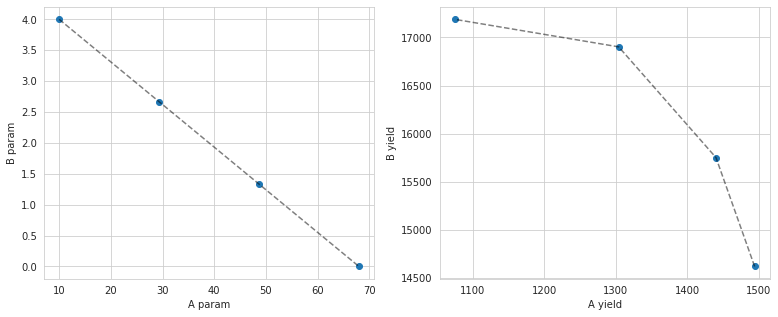

In [4]:
f, ax = plt.subplots(1, 2, figsize=(13, 5))

ax[0].scatter(df[param_a], df[param_b])
linspace = np.linspace(df[[param_a, param_b]].iloc[0].values,
    df[[param_a, param_b]].iloc[-1].values, 4)
ax[0].plot(linspace[:, 0], linspace[:, 1],    
     color="black", linestyle="--", alpha=.5, label="linear combination")
ax[0].set_ylabel(param_b);ax[0].set_xlabel(param_a)


ax[1].scatter(df[yield_a], df[yield_b])
linspace = np.linspace(df[[yield_a, yield_b]].iloc[0].values,
    df[[yield_a, yield_b]].iloc[-1].values,4)
ax[1].plot(df[yield_a].values, df[yield_b].values,
         color="black", linestyle="--", alpha=.5, label="linear combination")
ax[1].set_ylabel(yield_b);ax[1].set_xlabel(yield_a)

## Bokeh version

In [5]:
from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.embed import file_html
from bokeh.resources import CDN

In [6]:
output_notebook()

Loading BokehJS ...

In [7]:
f = figure(width=500, height=300, title=None, background_fill_color="#fafafa")

f.scatter(df[yield_a], df[yield_b], size=8, color="red")
f.line(df[yield_a].values, df[yield_b].values, color="black", alpha=.7)

source = ColumnDataSource(data=dict(x=df[yield_a][:1], y=df[yield_b][:1]))
f.scatter('x', 'y', source=source, line_alpha=0.6, size=6)

s = 8
a = df[yield_a]
b = df[yield_b]
l = (a.size - 1) * s + 1
A = np.interp(np.arange(l), np.arange(l, step=s), a)
B = np.interp(np.arange(l), np.arange(l, step=s), b)

slider = Slider(start=1, end=l, value=1, step=1, title="Slider")
from bokeh.resources import CDN
callback = CustomJS(args=dict(
    slider=slider,
    A=ColumnDataSource(data=dict(a=A)),
    B=ColumnDataSource(data=dict(b=B)),
    source=source), code="""                    
    const s = slider.value
    const a = A.data.a
    const b = B.data.b
    
    const myArray = [1, 2, 3, 4]
    
    const t = source.data.y
    const x = Array.from(t, (t) => a[s-1])
    const y = Array.from(t, (t) => b[s-1])
    source.data = { x, y }
""")
slider.js_on_change('value', callback)

f.xaxis.axis_label = 'A yield'
f.yaxis.axis_label = 'B yield'

show(row(column(f), column(slider)))

In [8]:
f = figure(width=500, height=300, title=None, background_fill_color="#fafafa")

f.scatter(df[yield_a], df[yield_b], size=8, color="red")
f.line(df[yield_a].values, df[yield_b].values, color="black", alpha=.7)

source = ColumnDataSource(data=dict(x=df[yield_a][:1], y=df[yield_b][:1]))
f.scatter('x', 'y', source=source, line_alpha=0.6, size=6)

s = 8
a = df[yield_a]
b = df[yield_b]
aa = df[param_a]
bb = df[param_b]
l = (a.size - 1) * s + 1
A = np.interp(np.arange(l), np.arange(l, step=s), a)
B = np.interp(np.arange(l), np.arange(l, step=s), b)
AA = np.interp(np.arange(l), np.arange(l, step=s), aa)
BB = np.interp(np.arange(l), np.arange(l, step=s), bb)

f2 = figure(width=500, height=300, title=None, background_fill_color="#fafafa")
f2.scatter(df[param_a], df[param_b], size=8, color="green")
f2.line(df[param_a].values, df[param_b].values, color="black", alpha=.7)

source2 = ColumnDataSource(data=dict(x2=df[param_a][:1], y2=df[param_b][:1]))
f2.scatter('x2', 'y2', source=source2, line_alpha=0.6, size=6, color="orange")

slider = Slider(start=1, end=l, value=1, step=1, title="Slider")

callback = CustomJS(args=dict(
    slider=slider,
    A=ColumnDataSource(data=dict(a=A)),
    B=ColumnDataSource(data=dict(b=B)),
    AA=ColumnDataSource(data=dict(aa=AA)),
    BB=ColumnDataSource(data=dict(bb=BB)),
    source=source, source2=source2), code="""                    
    const s = slider.value
    const a = A.data.a
    const b = B.data.b
    const aa = AA.data.aa
    const bb = BB.data.bb
    
    const t = source.data.y
    const x = Array.from(t, (t) => a[s-1])
    const y = Array.from(t, (t) => b[s-1])
    const x2 = Array.from(t, (t) => aa[s-1])
    const y2 = Array.from(t, (t) => bb[s-1])
    source.data = { x, y }
    source2.data = { x2, y2 }
""")
slider.js_on_change('value', callback)

f.xaxis.axis_label = 'A yield'
f.yaxis.axis_label = 'B yield'
f2.xaxis.axis_label = 'A param'
f2.yaxis.axis_label = 'B param'

show(row(column(f, f2), column(slider)))